<a href="https://colab.research.google.com/github/adithyarganesh/CSC555_Youtube_SNA/blob/main/SNA_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import mean, median, mode

In [ ]:
# Youtube Network Graph
data = pd.read_csv("/content/gdrive/My Drive/SC/youtube_network.csv")
G = nx.Graph()
G.add_nodes_from(list(data["FromNodeId"] < 663522))
for i,j in data.iterrows():
  if j["FromNodeId"] < 663522 and j["ToNodeId"] < 663522:
    G.add_edge(j["FromNodeId"], j["ToNodeId"])

In [ ]:
# Hypothesis 1

z = nx.pagerank(G, alpha = 0.85, max_iter = 6)

f =  open("/content/gdrive/My Drive/SC/youtube_community.txt", "r")
lis = []
t = []
communities = defaultdict(list)
community_social_analysis = defaultdict(list)
c = 0
for i in f:
    pr = 0
    c += 1
    temp = i.replace("\n", "").split(",")
    for j in temp:
        communities[int(j)].append(c)
        community_social_analysis[c].append(int(j))
        pr += z[int(j)]
    lis.append(pr)
    t.append(len(temp))
a, b = zip(*sorted(zip(t, lis)))
 
dict = defaultdict(list)
for i,j in zip(a,b):
    dict[i].append(j)

temp_key, temp_val = [], []
for key, value in dict.items():
  temp_key.append(key)
  temp_val.append(median(value))

Text(0, 0.5, 'Average Page Rank Value')

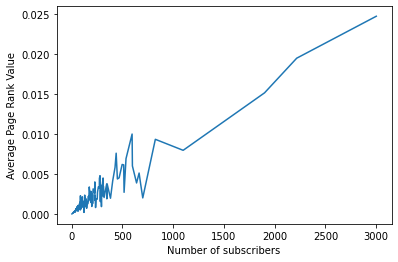

In [34]:
plt.plot(temp_key, temp_val)
plt.xlabel("Number of subscribers")
plt.ylabel("Average Page Rank Value")

In [ ]:
c = 0
m = []
for s,x in community_social_analysis.items():
  m.append((len(x), s))
  
comms = []
for i,j in sorted(m)[::-1]:
  comms.append(j)

sets = []
for i in [community_social_analysis[x] for x in comms]:
  sets.extend(i)

Hypothesis =  1 17732 34943


Text(0, 0.5, 'Number of Nodes')

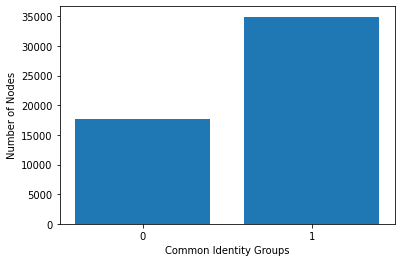

In [33]:
# Hypothesis 2
overall_majority = []
overall_edges = []
for node in list(G.nodes):
  neighbors = list(G.neighbors(node))
  node_community = communities[node]
  individual_majority = []
  if node_community:
    edges = []
    for neighbor in neighbors:
      n_community = communities[neighbor]
      if n_community:
        common_communities = set(node_community).intersection(set(n_community))
        if common_communities:
          individual_majority.append(1)
        else:
          individual_majority.append(0)
        edges.append(len(common_communities))
    try:
      overall_majority.append(mode(individual_majority))
      temp = 0 if max(sum(edges), edges.count(0)) == edges.count(0) else sum(edges)
      overall_edges.append(temp if mode(individual_majority) == 1 else 0)
    except Exception:
      overall_majority.append(1)
      overall_edges.append(sum(edges))

if overall_majority:
  print("Hypothesis = ", mode(overall_majority), overall_majority.count(0), overall_majority.count(1))

plt.bar(['0','1'],[overall_majority.count(0), overall_majority.count(1)])
plt.xlabel("Common Identity Groups")
plt.ylabel("Number of Nodes")

As it can be seen, there are about 19843 nodes with strong bonds, 15100 with weak bonds and about 17732 with no common bonds


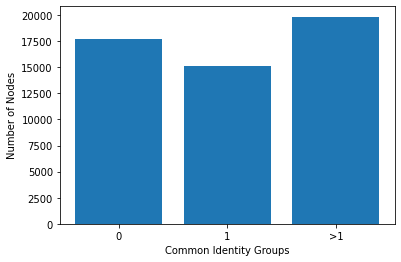

In [32]:
plt.bar(['0','1', '>1'],[overall_majority.count(0), overall_edges.count(1), len(overall_majority) - overall_majority.count(0) - overall_edges.count(1)])
plt.xlabel("Common Identity Groups")
plt.ylabel("Number of Nodes")
print(f"As it can be seen, there are about {len(overall_majority) - overall_majority.count(0) - overall_edges.count(1)} nodes with strong bonds, {overall_edges.count(1)} with weak bonds and about {overall_edges.count(0)} with no common bonds" )

In [ ]:
# We also notice that on an average, if there is a common bond between two individuals, there is a likelyhood that they have about 8 common communities (identities) between them
print(f"We also notice that on an average, if there is a common bond between two individuals, there is a likelyhood that they have about {sum(overall_edges)/overall_majority.count(1)} common communities (identities) between them.")

We also notice that on an average, if there is a common bond between two individuals, there is a likelyhood that they have about 8.480840225510116 common communities (identities) between them.


In [ ]:
maps = defaultdict(int)
for i, j in list(G.degree())[2:]:
  maps[j] += 1

In [ ]:
ss = sorted(list(maps.items()))
a,b = [], []
for x, y in ss:
  a.append(x)
  b.append(y)

Text(0, 0.5, 'Number of nodes')

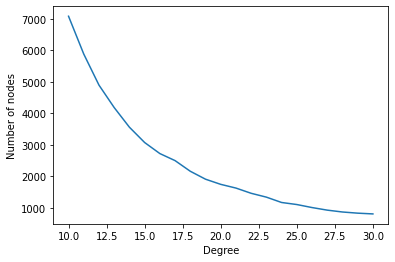

In [31]:
plt.plot(a[9:30],b[9:30])
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

In [ ]:
community_size = []
b_centrality = []
e_centrality = []
for size, community in sorted(m)[::-1][3:500]:
  G_comm = G.subgraph(community_social_analysis[community])
  b_centrality.append(sum(list(nx.algorithms.betweenness_centrality(G_comm).values()))/size)
  e_centrality.append(sum(list(nx.algorithms.eigenvector_centrality_numpy(G_comm).values()))/size)
  community_size.append(size)

Text(0, 0.5, 'average score')

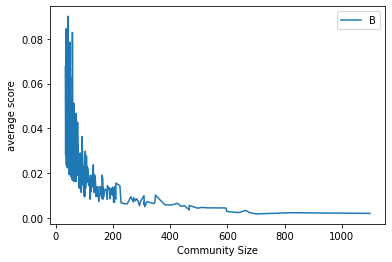

In [29]:
new_x, new_y = zip(*sorted(zip(community_size, b_centrality)))
plt.plot(new_x, new_y)
plt.gca().legend('Betweenness centrality values')
plt.xlabel("Community Size")
plt.ylabel("average score")

Text(0, 0.5, 'average score')

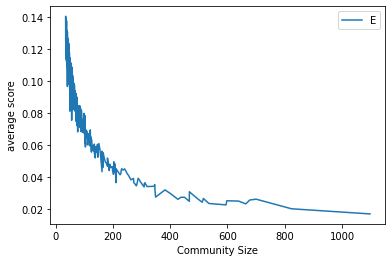

In [22]:
new_x, new_y = zip(*sorted(zip(community_size, e_centrality)))
plt.plot(new_x, new_y)
plt.gca().legend('Eigenvector centrality values')
plt.xlabel("Community Size")
plt.ylabel("average score")

In [43]:
clustering_coeff = nx.algorithms.average_clustering(G)

In [44]:
clustering_coeff

0.1071834874944918

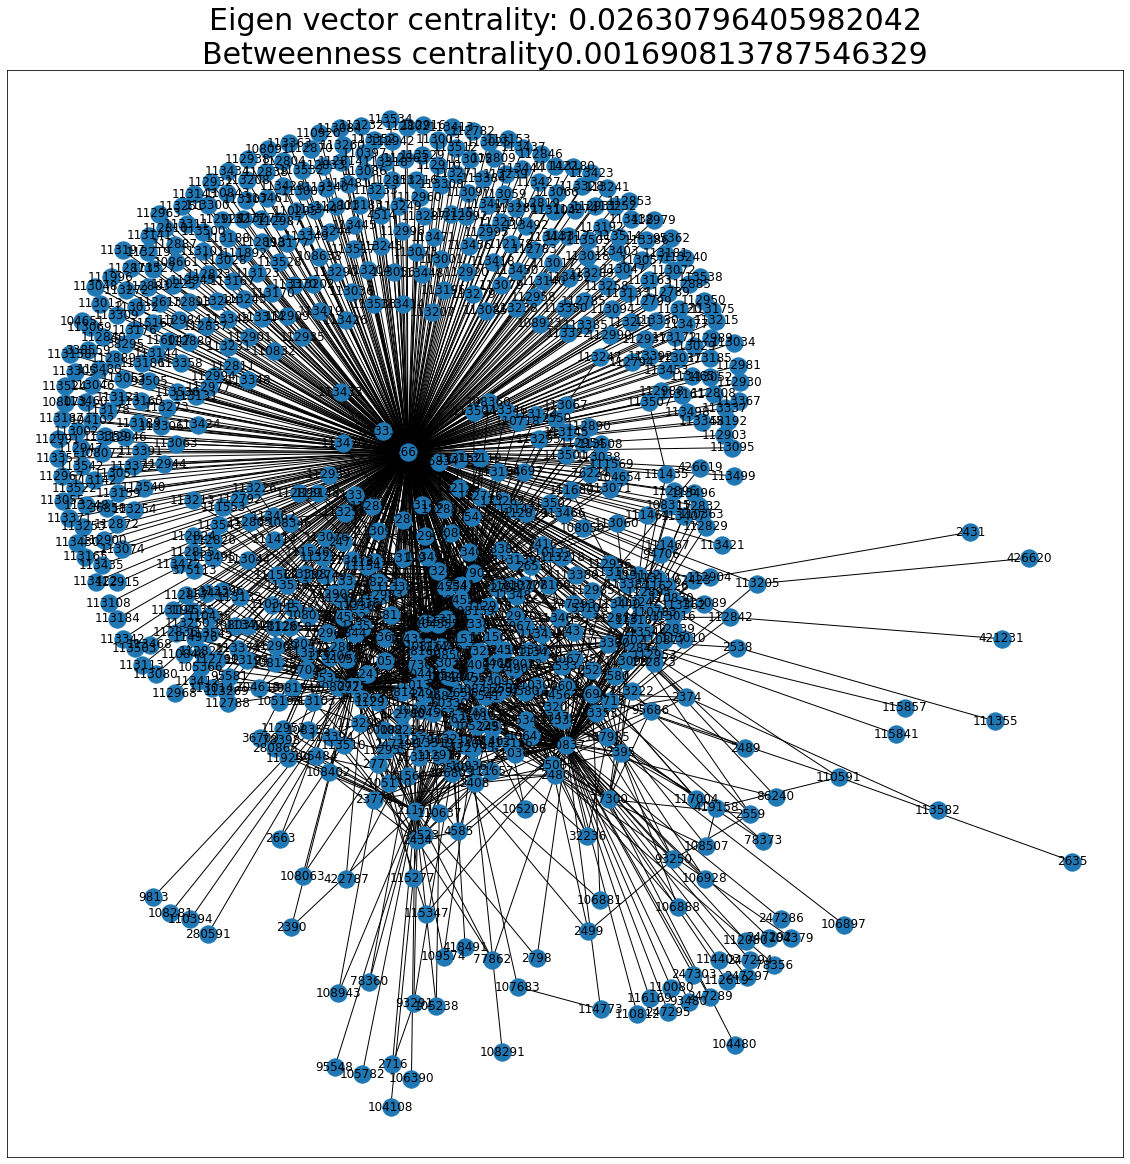

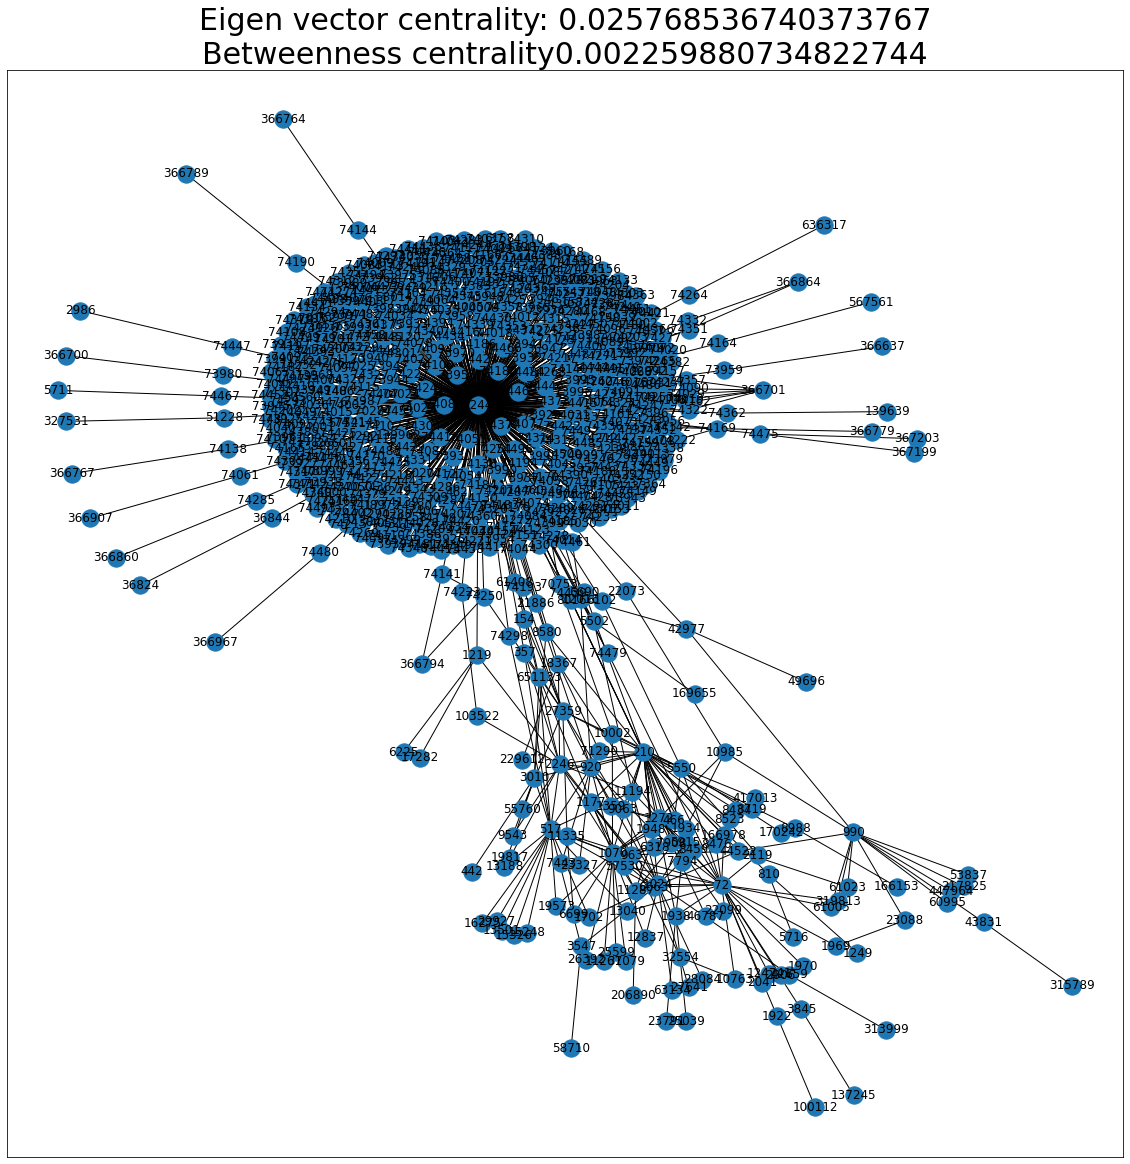

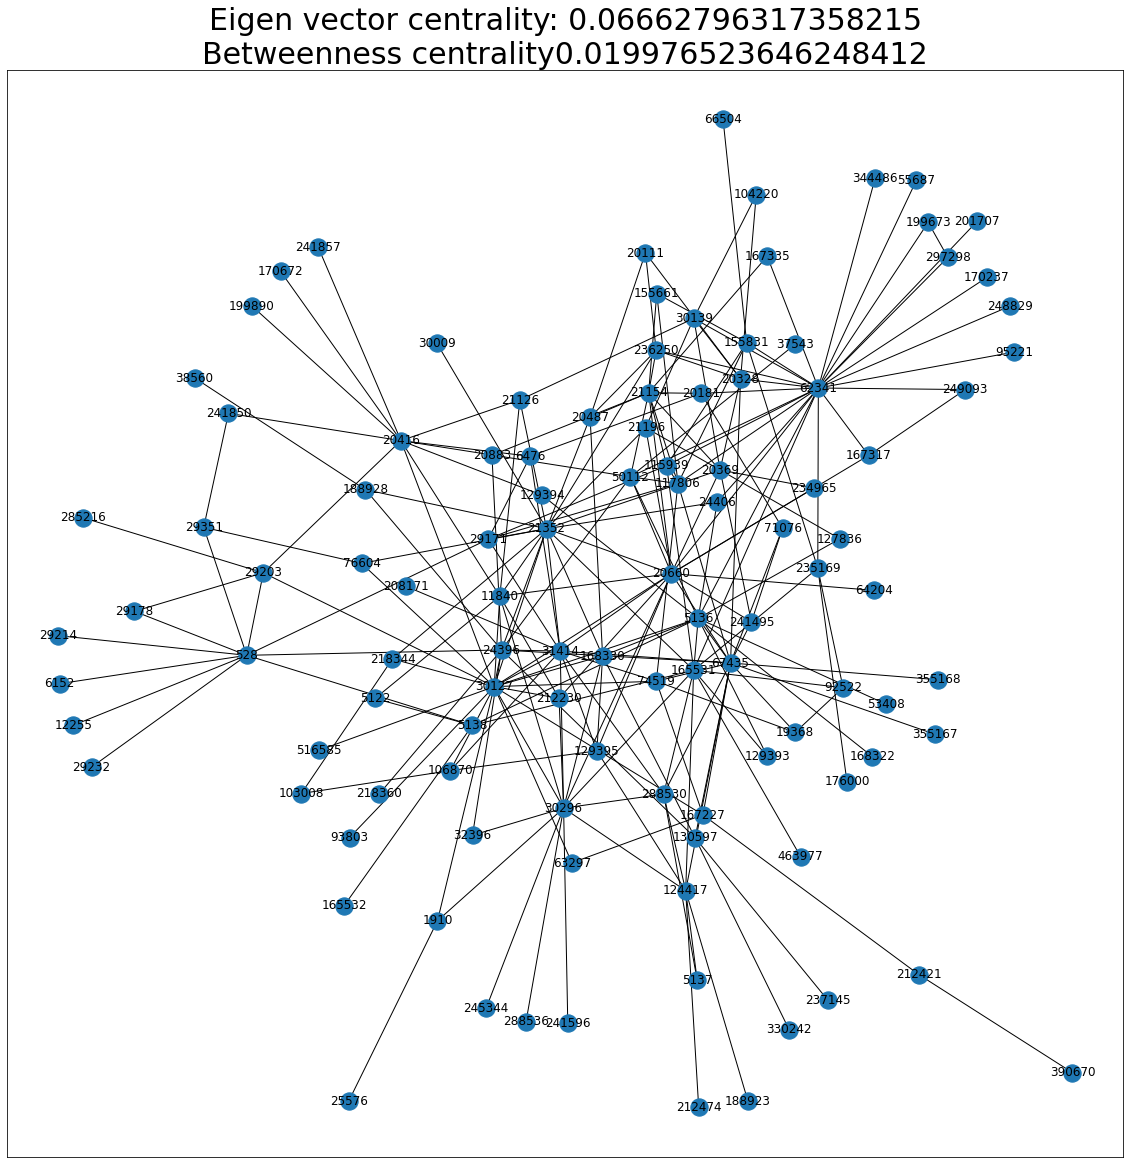

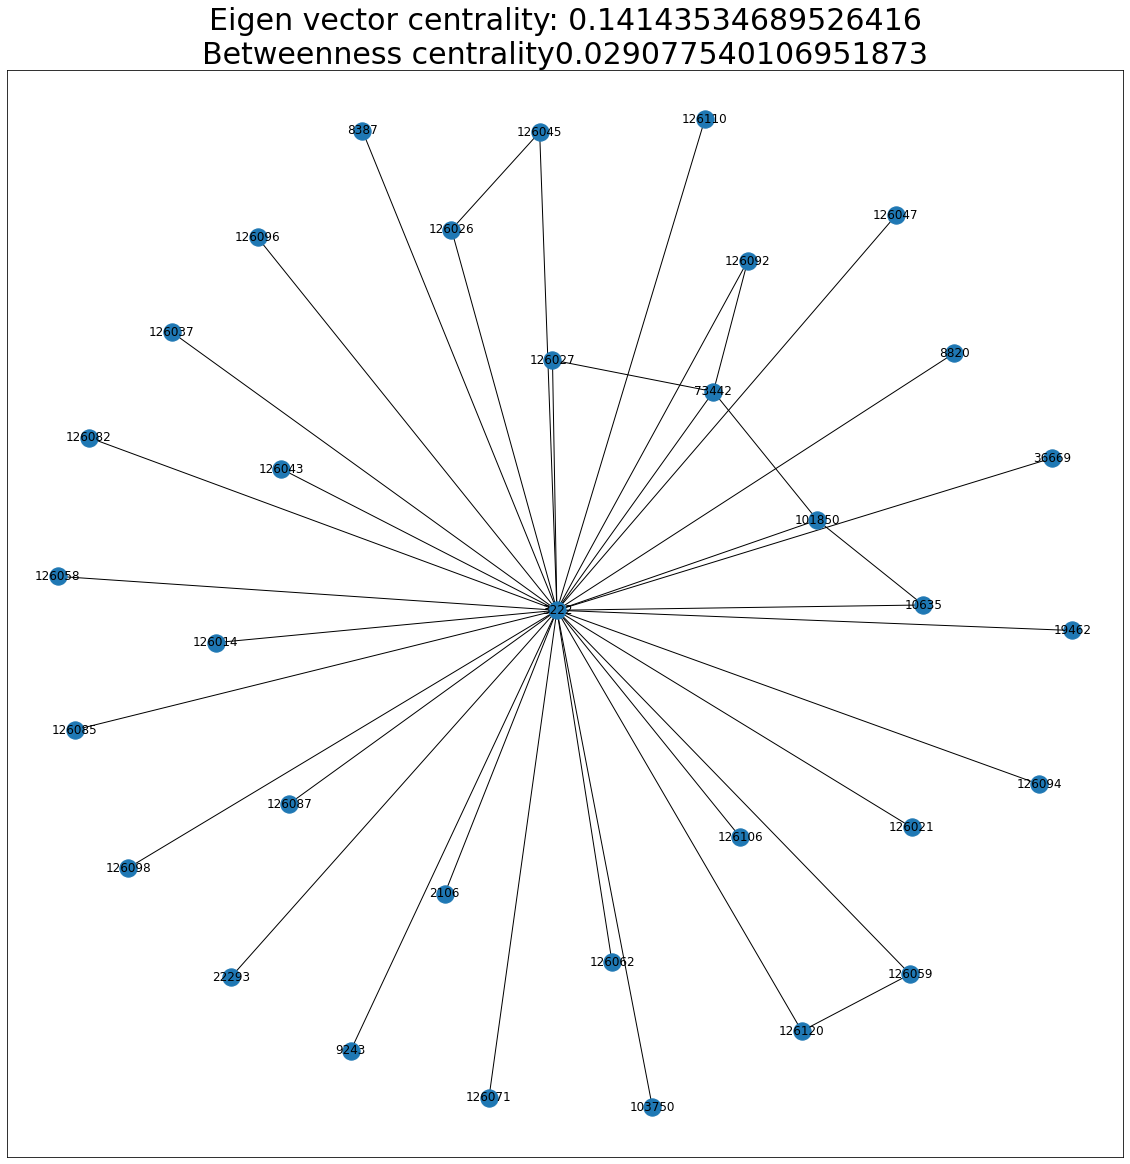

In [42]:
evc_list =  []
bc_list = []
size = []
metric_keys = [5,6,116,515]
for i in metric_keys:
  plt.figure(figsize=(20,20))
  sub_graph = nx.Graph.subgraph(G, community_social_analysis[comms[i]])
  nx.draw_networkx(sub_graph)
  evc = sum(list(nx.algorithms.eigenvector_centrality_numpy(sub_graph).values()))/len(list(sub_graph.nodes()))
  bc = sum(list(nx.algorithms.betweenness_centrality(sub_graph).values()))/len(list(sub_graph.nodes()))
  # print(f"Graph {i} has an eigen vector centrality of {evc} and an average betweenness centrality of {bc}")
  evc_list.append(evc)
  bc_list.append(bc)
  size.append(len(list(sub_graph.nodes())))
  plt.title(str("Eigen vector centrality: " + str(evc) +  "\nBetweenness centrality: " + str(bc)), fontdict = {'fontsize' : 30})
  plt.show()
  plt.close()

Text(0, 0.5, 'average score')

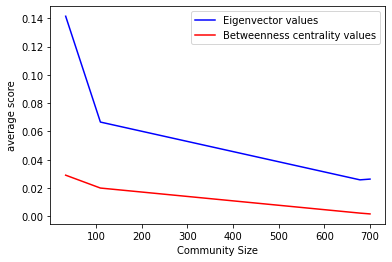

In [ ]:
plt.plot(size, evc_list, "-b")
plt.plot(size, bc_list, "-r")
plt.gca().legend(('Eigenvector values','Betweenness centrality values'))
plt.xlabel("Community Size")
plt.ylabel("average score")

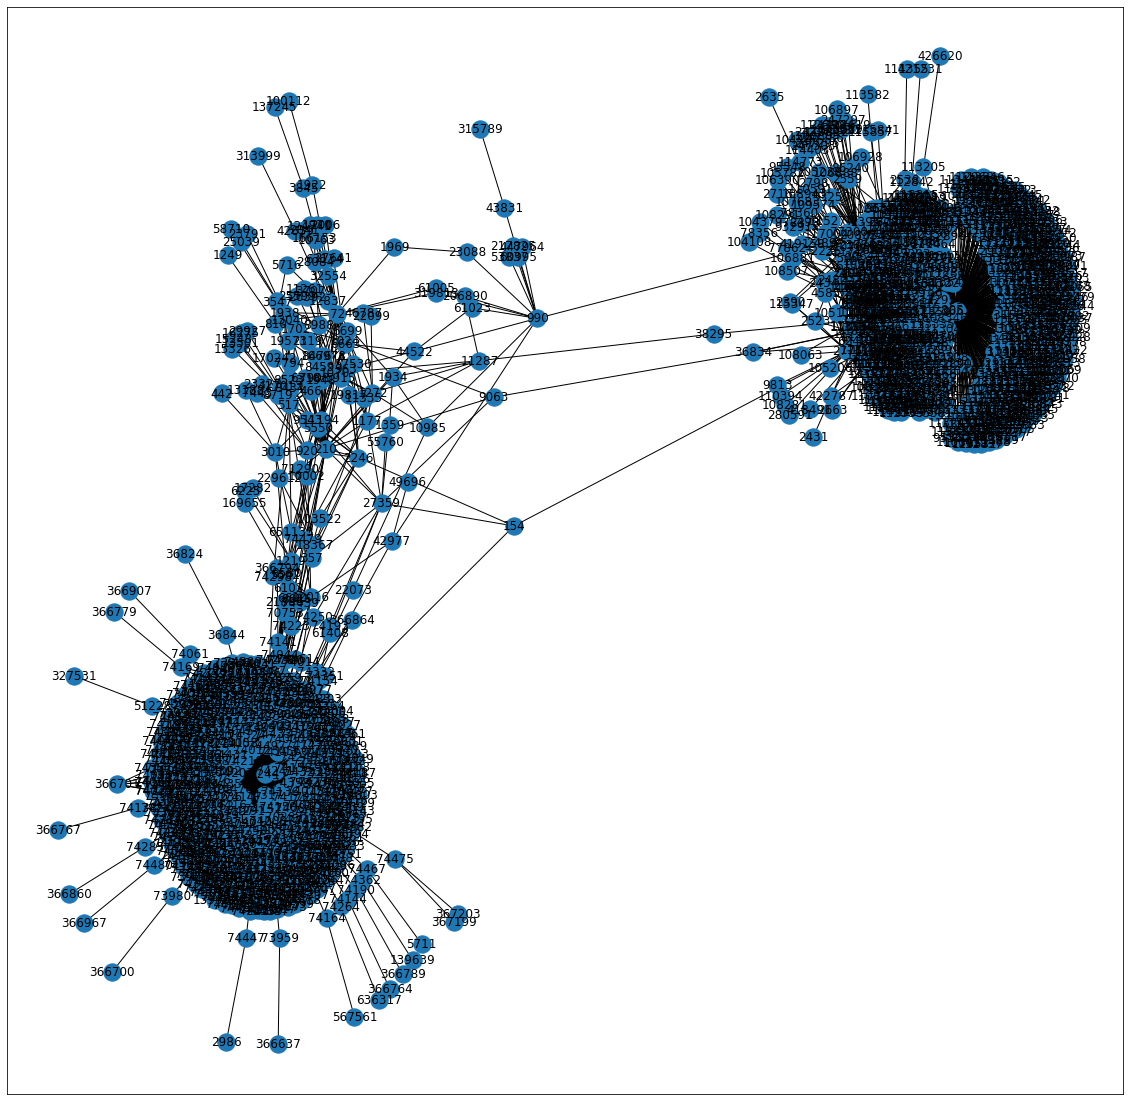

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(nx.Graph.subgraph(G, set(community_social_analysis[comms[5]] + community_social_analysis[comms[6]])))

In [ ]:
z = G.subgraph(community_social_analysis[27])

In [ ]:
len(community_social_analysis[27])

136

In [ ]:
z.edges

EdgeView([(1024, 1999), (1024, 63140), (6656, 2529), (6656, 16009), (6656, 19989), (6656, 20395), (6656, 20842), (6656, 28594), (6656, 63616), (6656, 72470), (6656, 91005), (6656, 92302), (6656, 92719), (6656, 93053), (6656, 132499), (6656, 181462), (6656, 181469), (182276, 78452), (64005, 23130), (64005, 145200), (125448, 29293), (125448, 64042), (125448, 73921), (125448, 78452), (243726, 20395), (243726, 21018), (243726, 63616), (230927, 18690), (180244, 78452), (19989, 91778), (19989, 92031), (96277, 252038), (130073, 20889), (21018, 1291), (21018, 1825), (21018, 1886), (21018, 2529), (21018, 11897), (21018, 20328), (21018, 20395), (21018, 20889), (21018, 23130), (21018, 24804), (21018, 28594), (21018, 49498), (21018, 63140), (21018, 63616), (21018, 73921), (21018, 86337), (21018, 90490), (21018, 91307), (21018, 92302), (21018, 92719), (21018, 94042), (21018, 95741), (21018, 96984), (21018, 167993), (21018, 181462), (21018, 190636), (21018, 191350), (21018, 246413), (21018, 250023),

In [ ]:
nx.algorithms.smallworld.omega(z)

0.6161798533657228